# Samyog Paudel

## Data Transformation and Mapping
- **apply**: allows us to apply a function to each element, row, or column in a DataFrame or Series
- **map**: is used to map values in a Series according to a dictionary or another Series 
- **replace**: replace allows for replacing specific values in the DataFrame with new value
- **astype**: this is used to convert data type
- **pipe**: it allows chaining and using complex functions that operate on the entire DataFrame. This can be used for complex transformation operation

### apply

In [2]:
# convert marks to scale of 1
import pandas as pd
students = pd.read_csv('data/student.csv')
students['mark_percent'] = students['mark'].apply(lambda m: m/100)
students.head()


,id,name,class,mark,gender,mark_percent
0,1,John Deo,Four,NaN,female,NaN
1,2,Max Ruin,Three,85.0,male,0.85
2,3,Arnold,Three,55.0,male,0.55
3,4,Krish Star,Four,60.0,NaN,0.60
4,5,John Mike,Four,60.0,NaN,0.60


### map

In [3]:
#Replace
students['grade'] = students['class'].map({'One':1,'Two':2,'Three':3,'Four':4,'Five':5,
                                           'Six':6,'Seven':7,'Eight':8,'Nine':9,'Ten':10})
students['gender_code'] = students['gender'].map({'male':1,'female':2})
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,John Deo,Four,NaN,female,NaN,4.0,2.0
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1.0
2,3,Arnold,Three,55.0,male,0.55,3.0,1.0
3,4,Krish Star,Four,60.0,NaN,0.60,4.0,NaN
4,5,John Mike,Four,60.0,NaN,0.60,4.0,NaN


### replace

In [4]:
#Replace specific values in the 'class' column
students['class'] = students['class'].replace({'Four':'4th','Ten':'10th','Eight':'8th'})
#replace name 'John Deo' with 'Hri'
students['name'] = students['name'].replace({'John Deo':'Hri'})
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,Hri,4th,NaN,female,NaN,4.0,2.0
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1.0
2,3,Arnold,Three,55.0,male,0.55,3.0,1.0
3,4,Krish Star,4th,60.0,NaN,0.60,4.0,NaN
4,5,John Mike,4th,60.0,NaN,0.60,4.0,NaN


### astype

In [5]:
# Convert 'mark' column to float
students['mark'] = students['mark'].astype(float)
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,Hri,4th,NaN,female,NaN,4.0,2.0
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1.0
2,3,Arnold,Three,55.0,male,0.55,3.0,1.0
3,4,Krish Star,4th,60.0,NaN,0.60,4.0,NaN
4,5,John Mike,4th,60.0,NaN,0.60,4.0,NaN


### pipe

In [6]:
# create a function that triples marks and pipes it to the pandas DataFrame

students = pd.read_csv('data/student.csv')
def triple_marks(df):
    df['mark']= df['mark'] * 3
    return df

def check_result(df):
    df['result'] = df['mark'].apply(lambda m : 'pass' if m>40 else 'fail')
    return df

students = students.pipe(check_result)
students.head()

,id,name,class,mark,gender,result
0,1,John Deo,Four,NaN,female,fail
1,2,Max Ruin,Three,85.0,male,pass
2,3,Arnold,Three,55.0,male,pass
3,4,Krish Star,Four,60.0,NaN,pass
4,5,John Mike,Four,60.0,NaN,pass


### Data cleaning and manipulation
- Handle Missing Data
- Handle Duplications
- One-hot_Encoding
- Normalization

- Remove Rows Containing Missing Values (df. dropna ())
    - dropna (axis=0) removes rows containing at least one missing value
    - (dropna (axis=1)) Removes columns containing at least one missing value
- Replace Missing Values (df.fillna())
    - Replace with specific value: (df.fillna(value)) fill the missing values with the previous row value of column value (if axis =1)
    - Backward Fill, Forward Fill: (df. fillna (value, method="bfill*))
    (df. fillna(value, method='ffill')) replaces the missing values with the next value
    - Fill individual column with specified value: (df. fillna({'height' :150, weight: 60})
    replaces the missing values of column.height with 150 and column weight with 60
    - Fill the average,--- missing values using average, or using interpolation


In [7]:
from IPython.display import display

students = pd.read_csv('data/student.csv')
display(students.head())
#students.dropna(axis=0, how = 'any', inplace=True)

#students = students.fillna(1) #replace missing valyes with 1

students.fillna(method = 'ffill') #fill with previous row value
students.fillna(method = 'bfill') #fill with next row
students['mark'].fillna(50) #only fill empty value of Name column
students.fillna({'mark':50, 'gender': 'Male'}) #replace mark with 50 if its empty and gender
df_interpolated = students.interpolate()
students.fillna(df_interpolated)
students['mark'].fillna(students['mark'].mean())

display(students.head())

,id,name,class,mark,gender
0,1,John Deo,Four,NaN,female
1,2,Max Ruin,Three,85.0,male
2,3,Arnold,Three,55.0,male
3,4,Krish Star,Four,60.0,NaN
4,5,John Mike,Four,60.0,NaN


C:\Users\Victus\AppData\Local\Temp\ipykernel_10788\773364397.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students.fillna(method = 'ffill') #fill with previous row value
C:\Users\Victus\AppData\Local\Temp\ipykernel_10788\773364397.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students.fillna(method = 'bfill') #fill with next row
C:\Users\Victus\AppData\Local\Temp\ipykernel_10788\773364397.py:13: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = students.interpolate()


,id,name,class,mark,gender
0,1,John Deo,Four,NaN,female
1,2,Max Ruin,Three,85.0,male
2,3,Arnold,Three,55.0,male
3,4,Krish Star,Four,60.0,NaN
4,5,John Mike,Four,60.0,NaN


## Handle Duplicate Data
- Check Duplicates
- Drop Dublicates

In [8]:
duplicates = students.duplicated() #check duplicate
students.drop_duplicates()
duplicates

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

## One-Hot Encoding
- One Hot Encoding is a method for converting categorical variables into a binary format. It creates new binary columns (Os and 1s) for each category in the original variable. Each category in the original column is represented as a separate column, where a value of 1 indicates the presence of that category, and 0 indicates its absence For example we replace the country name with numerical
value e.g. America = 1, India=2 Nepal=3 

In [9]:
students = pd.read_csv('data/student.csv')
df_pandas_encoded = pd.get_dummies(students, columns=['class'])
print(f"One-Hot Encoded Data using Pandas: \n")
display(df_pandas_encoded)

One-Hot Encoded Data using Pandas: 



,id,name,mark,gender,class_Eight,class_Fifth,class_Five,class_Four,class_Nine,class_Seven,class_Six,class_Three
0,1,John Deo,NaN,female,False,False,False,True,False,False,False,False
1,2,Max Ruin,85.0,male,False,False,False,False,False,False,False,True
2,3,Arnold,55.0,male,False,False,False,False,False,False,False,True
3,4,Krish Star,60.0,NaN,False,False,False,True,False,False,False,False
4,5,John Mike,60.0,NaN,False,False,False,True,False,False,False,False
5,6,Alex John,55.0,male,False,False,False,True,False,False,False,False
6,7,My John Rob,78.0,male,False,True,False,False,False,False,False,False
7,8,Asruid,85.0,male,False,False,True,False,False,False,False,False
8,9,Tes Qry,78.0,male,False,False,False,False,False,False,True,False
9,10,Big John,55.0,NaN,False,False,False,True,False,False,False,False


## Data Normalization
Data normalization involves adjusting measurements values of different scales to a common scale. 
Normalization is only applicable to numerical columns.

In [10]:
import numpy as np
import pandas as pd
products = pd.read_csv('data/product-data.csv')
#single feature scaling
products['Sales_Single_Scale']= products['Sales']/products['Sales'].max()
#log
products['Sales_Log_Scale']=np.log(products['Sales'])
#clipping
products['Discount_Clipped']= products['Discount_Percentage'].clip(lower=5, upper=15)
products

,Product_ID,Sales,Price,Customer_Rating,Discount_Percentage,Sales_Single_Scale,Sales_Log_Scale,Discount_Clipped
0,1,500,200,4.2,10,0.50,6.214608,10
1,2,700,450,3.9,15,0.70,6.551080,15
2,3,800,300,4.5,12,0.80,6.684612,12
3,4,900,350,4.8,8,0.90,6.802395,8
4,5,1000,500,4.0,5,1.00,6.907755,5
5,6,300,250,3.7,20,0.30,5.703782,15
6,7,450,275,4.3,17,0.45,6.109248,15
7,8,620,320,3.8,7,0.62,6.429719,7
8,9,750,400,4.1,6,0.75,6.620073,6
9,10,850,375,4.6,14,0.85,6.745236,14


## Grouping & Aggregate
- Grouping consists of three operations
    - Split
    - Apply
    - Combine

In [11]:
import numpy as np
from IPython.display import display

students = pd.read_csv('data/student.csv')

#group by gender
gender_data = students.groupby('gender')
display(gender_data.count())
gender_data['mark'].mean()
#standard deviation (std())

group_by_class = students.groupby('class')
display(group_by_class['mark'].mean())
display(group_by_class['id'].count())

,id,name,class,mark
gender,,,,
female,14,14,14,11
male,18,18,18,15


class
Eight          NaN
Fifth    78.000000
Five     80.000000
Four     67.857143
Nine     41.500000
Seven    75.000000
Six      87.333333
Three    73.666667
Name: mark, dtype: float64

class
Eight     1
Fifth     1
Five      2
Four      9
Nine      2
Seven    10
Six       7
Three     3
Name: id, dtype: int64

## Sorting
Sort by Index

Sort by value
- Ascending
- Descending
- Sorting by data
- Sorting with key function

In [12]:
country_data_list = [
            ['Afghanistan', 1952, 8425333, 'Asia'],
            ['Australia', 1957, 9712569, 'Oceania'],
            ['Brazil', 1892, 9873823, 'America'],
]
country_data = pd.DataFrame(country_data_list, columns=['Country','Year','Population','Continent'])
new_sorted_data = country_data.sort_values(by=['Country'],ascending=True)
display(new_sorted_data)

sort_by_descending = country_data.sort_values(by=['Country'],ascending=False)
display(sort_by_descending)
sort_by_population = country_data.sort_values(by=['Population','Country'], ascending=False)
display(sort_by_population)

,Country,Year,Population,Continent
0,Afghanistan,1952,8425333,Asia
1,Australia,1957,9712569,Oceania
2,Brazil,1892,9873823,America


,Country,Year,Population,Continent
2,Brazil,1892,9873823,America
1,Australia,1957,9712569,Oceania
0,Afghanistan,1952,8425333,Asia


,Country,Year,Population,Continent
2,Brazil,1892,9873823,America
1,Australia,1957,9712569,Oceania
0,Afghanistan,1952,8425333,Asia


## Sorting by Data
If we want sort data based on datetime we need to convert the datetime to datetime object

In [13]:
    data = pd.read_csv('data/student-admission.csv')
#convert to datetime
data['AdmissionDate']= pd.to_datetime(data['AdmissionDate'])
#sort by AdmissionDate
sort_by_date = data.sort_values(by=['AdmissionDate','Name'],ascending=False)
sort_by_date

,Unnamed: 0,AdmissionDate,StudentID,Name,Stream
0,0,2021-01-25,7,Ram,CSE
1,1,2021-01-22,5,Shyam,ECE
4,4,2021-01-22,6,Lucky,CSE
6,6,2021-01-21,4,Danny,EEE
2,2,2021-01-20,3,Mohan,Civil
3,3,2021-01-18,2,Sohan,Mechanical
5,5,2021-01-17,1,Abhinav,IT


## Compare GDP growth of Nepal, India and China
- Bar chart
- Line graph

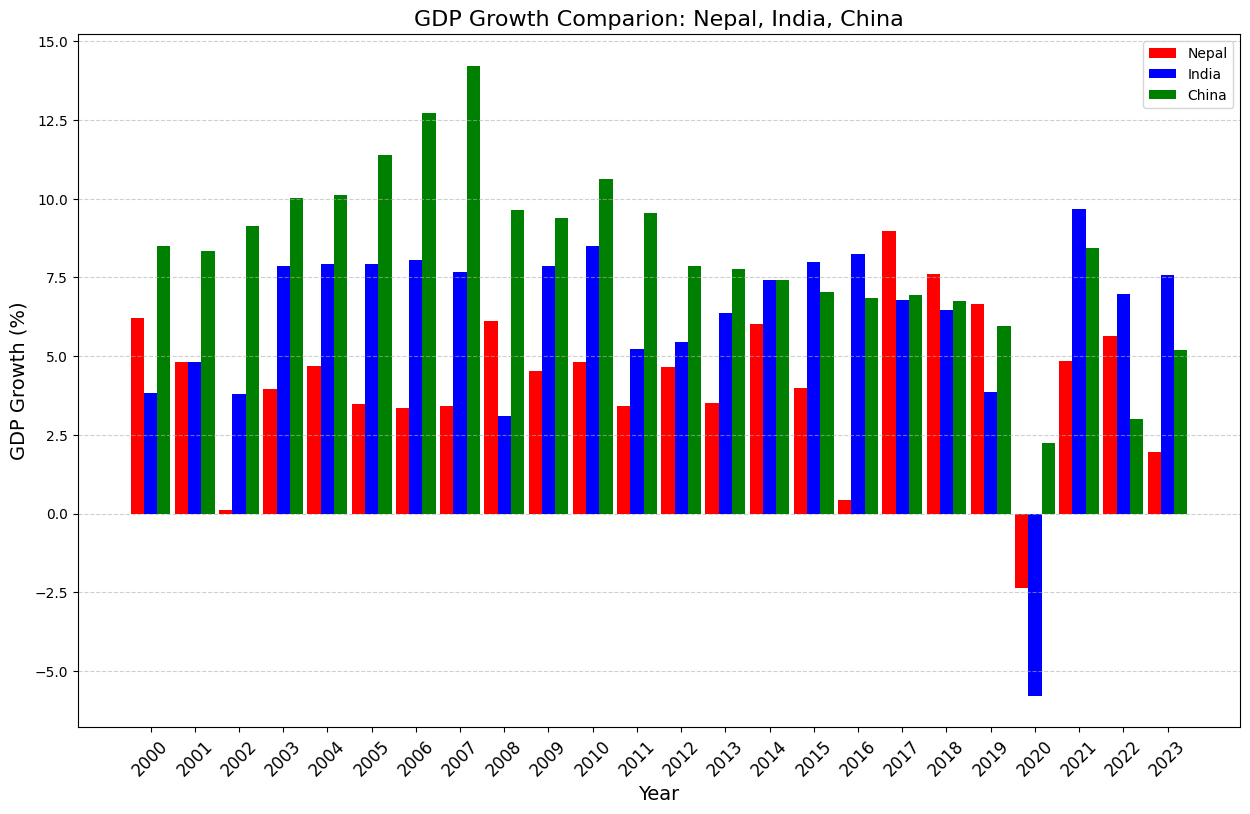

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
nep_ind_china_gdp_data = pd.read_csv('data/nep-india-china-gdp.csv')
#set up the figure size
plt.figure(figsize=(15,9))
#define the width of the bars
width = 0.3
x = range(len(nep_ind_china_gdp_data['Year']))
#plotting the bars for Nep Ind and China
plt.bar([i - width for i in x], nep_ind_china_gdp_data['Nepal'], width=width, label='Nepal', color='Red')
plt.bar(x, nep_ind_china_gdp_data['India'], width=width, label='India',color='blue')
plt.bar([i + width for i in x], nep_ind_china_gdp_data['China'], width=width, label='China', color='green')

#adding titles and labels
plt.title('GDP Growth Comparion: Nepal, India, China',fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP Growth (%)', fontsize=14)
plt.xticks(x, nep_ind_china_gdp_data['Year'], fontsize=12, rotation=45 )
plt.legend()

plt.grid(axis='y',linestyle='--', alpha=0.6)
plt.show()